In [1]:
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from vision import WIDTH, TargetDetector, TargetDetectorMobileNet
from board import Board
from motor_controller import Direction, MotorController
from distance import DistanceSensor
import time
from typing import Optional, Tuple
from timer import timer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def _get_direction(target: int, width: int = WIDTH, side_ratio: float = 0.33) -> Direction:
    if target < side_ratio * width:
        return Direction.LEFT
    elif target > (1 - side_ratio) * width:
        return Direction.RIGHT
    else:
        return Direction.FORWARD

def get_direction(target: int, last_direction: Optional[Direction], width: int = WIDTH, side_ratio: float = 0.25) -> Direction:
    direction = _get_direction(target, width, side_ratio)
    if direction == last_direction and direction in (Direction.LEFT, Direction.RIGHT):
        return Direction.NONE
    return direction

In [4]:
def get_turn_duration(target: int, width: int = WIDTH, side_ratio: float = 0.33, min_duration: float = 0.25, max_duration: float = 0.5) -> float:
    if target < side_ratio * width:
        return (1 - (target / (side_ratio * width))) * (max_duration - min_duration) + min_duration
    elif target > (1 - side_ratio) * width:
        return ((target - (1 - side_ratio) * width) / (side_ratio * width)) * (max_duration - min_duration) + min_duration
    else:
        # forward: 2 * max
        return 2 * max_duration

In [5]:
def plot_distances(distances, fig, ax):
    if not (distances is None) and len(distances.shape) == 2:
        ax.scatter(distances[:, 0], distances[:, 1])
        ax.set_xlim(-50, 50)
        ax.set_ylim(0, 100)
        fig.canvas.draw()

INFO:Timer:Latency: 0.161933 sec
INFO:TargetDetectorMobileNet:Capture thread started
INFO:TargetDetectorMobileNet:Detect thread started
INFO:DistanceSensor:Motor control loop started
INFO:root:Distance controller started


Motor control loop started
Motor controller started


INFO:Timer:Latency: 0.095101 sec
INFO:Timer:Latency: 0.095340 sec
INFO:Timer:Latency: 0.096408 sec
INFO:Timer:Latency: 0.095401 sec
INFO:Timer:Latency: 0.095742 sec
INFO:Timer:Latency: 0.095375 sec
INFO:Timer:Latency: 2.339261 sec
INFO:Timer:Latency: 0.095672 sec
INFO:Timer:Latency: 0.095480 sec
INFO:Timer:Latency: 0.095090 sec
INFO:Timer:Latency: 0.095323 sec
INFO:Timer:Latency: 0.095634 sec
INFO:Timer:Latency: 0.095402 sec
INFO:Timer:Latency: 0.095225 sec
INFO:Timer:Latency: 0.095288 sec
INFO:Timer:Latency: 2.063135 sec
INFO:Timer:Latency: 0.095731 sec
INFO:Timer:Latency: 0.095801 sec
INFO:Timer:Latency: 0.095805 sec
INFO:Timer:Latency: 0.096714 sec
INFO:Timer:Latency: 0.095428 sec
INFO:Timer:Latency: 0.095148 sec
INFO:Timer:Latency: 0.095472 sec
INFO:Timer:Latency: 0.095158 sec
INFO:Timer:Latency: 2.178263 sec
INFO:Timer:Latency: 0.095538 sec
INFO:Timer:Latency: 0.095324 sec
INFO:Timer:Latency: 0.095308 sec
INFO:Timer:Latency: 0.096066 sec
INFO:Timer:Latency: 0.095500 sec
INFO:Drivi

Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.096889 sec
INFO:Driving:Target found: (369, 238) Direction.FORWARD, 1.0
INFO:Timer:Latency: 1.594915 sec
INFO:Timer:Latency: 0.094958 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (376, 236) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.101205 sec
INFO:Driving:Target found: (367, 199) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


Exception in thread Thread-12 (_distance_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/pi/Documents/PythonEnv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pi/Documents/RobotCar/distance.py", line 79, in _distance_loop
    distances = self._get_distance_ahead_smoothed(is_reversed)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pi/Documents/RobotCar/timer.py", line 10, in wrapper
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/home/pi/Documents/RobotCar/distance.py", line 65, in _get_distance_ahead_smoothed
    distance = self._get_distance()
               ^^^^^^^^^^^^^^^^^^^^
  File "/home/pi/Documents/RobotCar/distance.py", line 55, in _get_dista

Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095455 sec
INFO:Driving:Target found: (320, 197) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095340 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (319, 199) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095139 sec
INFO:Driving:Target found: (318, 207) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095364 sec


I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095327 sec
INFO:Timer:Latency: 0.095239 sec
INFO:Driving:Target found: (372, 226) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095499 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (322, 232) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095378 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (320, 201) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095334 sec
INFO:Driving:Target found: (344, 221) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095281 sec
INFO:Driving:Target found: (354, 226) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095194 sec
INFO:Driving:Target found: (339, 224) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.096568 sec
INFO:Driving:Target found: (330, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095623 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (337, 225) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095694 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (329, 227) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095955 sec
INFO:Driving:Target found: (331, 219) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095458 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (327, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097437 sec
INFO:Driving:Target found: (333, 221) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.097729 sec
INFO:Driving:Target found: (330, 219) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.097724 sec
INFO:Driving:Target found: (327, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097752 sec
INFO:Driving:Target found: (330, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.097203 sec
INFO:Driving:Target found: (331, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097462 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (327, 221) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097741 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (325, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.097322 sec
INFO:Driving:Target found: (327, 220) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.097200 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (325, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095659 sec
INFO:Driving:Target found: (330, 224) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095092 sec
INFO:Driving:Target found: (326, 220) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095292 sec
INFO:Driving:Target found: (310, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095057 sec
INFO:Driving:Target found: (323, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095241 sec
INFO:Driving:Target found: (328, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095235 sec
INFO:Driving:Target found: (329, 221) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095247 sec
INFO:Driving:Target found: (326, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095084 sec
INFO:Driving:Target found: (326, 220) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095382 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (321, 221) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095253 sec
INFO:Driving:Target found: (328, 224) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095256 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (321, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095301 sec
INFO:Driving:Target found: (324, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095532 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (324, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095336 sec
INFO:Driving:Target found: (326, 219) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095220 sec
INFO:Driving:Target found: (326, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095115 sec
INFO:Driving:Target found: (323, 223) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095463 sec
INFO:Driving:Target found: (329, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095112 sec
INFO:Driving:Target found: (323, 221) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095478 sec
INFO:Driving:Target found: (318, 230) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095425 sec
INFO:Driving:Target found: (324, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095589 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (325, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095362 sec
INFO:Driving:Target found: (320, 230) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095309 sec
INFO:Driving:Target found: (326, 222) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095474 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (330, 224) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095570 sec
INFO:Driving:Target found: (336, 223) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.096197 sec
INFO:Driving:Target found: (312, 233) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095415 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (317, 231) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095415 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (317, 233) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095333 sec
INFO:Driving:Target found: (319, 236) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095176 sec
INFO:Driving:Target found: (319, 229) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095391 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (318, 236) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095224 sec
INFO:Driving:Target found: (318, 232) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095529 sec
INFO:Driving:Target found: (320, 222) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095198 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (322, 218) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095556 sec
INFO:Driving:Target found: (311, 227) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095501 sec
INFO:Driving:Target found: (315, 227) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095274 sec
INFO:Driving:Target found: (317, 228) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Timer:Latency: 0.095603 sec
INFO:Driving:Target found: (316, 216) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095673 sec
INFO:Driving:Target found: (319, 219) Direction.FORWARD, 1.0


I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095064 sec
INFO:Driving:Target found: (328, 211) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095102 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (324, 227) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.094845 sec
INFO:Driving:Target found: (315, 217) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095344 sec
INFO:Driving:Target found: (319, 231) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095314 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (314, 227) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095444 sec
INFO:Driving:Target found: (320, 230) Direction.FORWARD, 1.0


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Timer:Latency: 0.095152 sec


Direction: Direction.FORWARD, duration: 1.0ms
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error
I2C Error : [Errno 121] Remote I/O error


INFO:Driving:Target found: (325, 220) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095181 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (320, 230) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095666 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (319, 224) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095004 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (320, 232) Direction.FORWARD, 1.0
INFO:Timer:Latency: 0.095367 sec


Direction: Direction.FORWARD, duration: 1.0ms


INFO:Driving:Target found: (319, 222) Direction.FORWARD, 1.0
INFO:root:Distance controller stopped


Direction: Direction.FORWARD, duration: 1.0ms
Motor control loop stopped
Motor controller stopped


INFO:Timer:Latency: 0.116443 sec
Exception in thread Thread-9 (_capture):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1038, in _bootstrap_inner


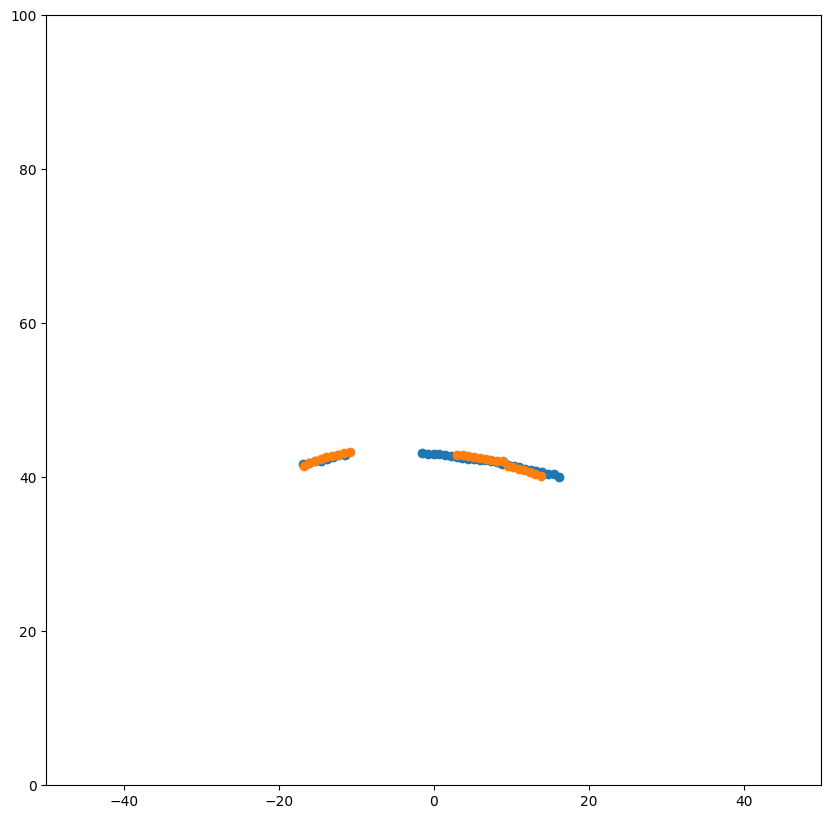

    self.run()
  File "/home/pi/Documents/PythonEnv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pi/Documents/RobotCar/vision.py", line 60, in _capture
    self.camera.grab()
    ^^^^^^^^^^^
AttributeError: 'TargetDetectorMobileNet' object has no attribute 'camera'


In [7]:
target_detector = TargetDetectorMobileNet(confidence=0.5)
board = Board()
motor_controller = MotorController(board)

is_stop = False

def emergency_stop():
    global is_stop
    is_stop = True

distance_sensor = DistanceSensor(board, 10, emergency_stop)

logger = logging.getLogger('Driving')

fig, ax = plt.subplots(figsize=(10, 10))

try:
    target_detector.start()
    motor_controller.start()
    distance_sensor.start()

    direction = None
    for i in range(500):
        if is_stop:
            raise Exception('Emergency stop')
        target = target_detector.get_target()
        if target:
            x, _ = target
            direction = get_direction(x, direction, WIDTH)
            duration = get_turn_duration(x, WIDTH)
            logger.info('Target found: %s %s, %s', target, direction, duration)
            motor_controller.send_direction(direction, duration)
            plot_distances(distance_sensor.get_distances(), fig, ax)
        time.sleep(0.05)

finally:
    board.stop()
    motor_controller.stop()
    target_detector.stop()
    distance_sensor.stop()
    plt.show()